# Predicting the Price of Used Cars

In this Project, we are going to predict the Price of Used Cars using various features like Brand, Price, Mileage, Fuel_Type, Year etc. The data used in this project was downloaded from Kaggle.

**To be able to predict used cars market value can help both buyers and sellers.**

There are lots of individuals who are interested in the used car market at some points in their life because they wanted to sell their car or buy a used car. In this process, it’s a big corner to pay too much or sell less then it’s market value.

Attributes

Brand:

Description: The manufacturer or company that produces the vehicle. This attribute helps in identifying the make of the vehicle, which can be a significant factor in its popularity, reliability, and resale value.
Example Values: Toyota, Honda, Ford, BMW, Tesla.

Price:

Description: The cost of the vehicle, often represented in a specific currency (e.g., USD, EUR). This attribute is crucial for understanding the market value of the vehicle and is often influenced by the brand, features, condition, and market demand.
Example Values: $25,000, $18,500, $35,999.

Mileage:

Description: The distance the vehicle has traveled, typically measured in miles or kilometers. This attribute is often used to gauge the wear and tear on the vehicle. Lower mileage is generally associated with less wear and potentially higher resale value.
Example Values: 15,000 miles, 45,000 km, 85,000 miles.

Fuel_Type:

Description: The type of fuel the vehicle uses. This attribute is essential for understanding the vehicle's running costs, environmental impact, and performance characteristics. Different fuel types can significantly influence the vehicle's operating costs and efficiency.
Example Values: Gasoline, Diesel, Electric, Hybrid, CNG.


Car Model
Description: The specific model of the vehicle produced by the manufacturer. This attribute helps identify the particular version or variant of a car within the brand's lineup. Different models can have distinct features, performance characteristics, sizes, and price points, even if they are from the same brand.
Example Values: Corolla, Civic, Model 3, Focus, 3 Series.


Registration
Description: The unique identifier or license plate number assigned to a vehicle upon registration. This attribute is used to track the vehicle within legal and administrative systems. Registration information often includes details such as the registration date, expiration date, and the region or country where the vehicle is registered.

# Importing libraries

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

# Loading the raw data

In [107]:
car_data = pd.read_csv(r"C:\Users\samira\Desktop\ML Project Using Flask\Datasets\car_price_data1.csv")

In [108]:
car_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing

### Exploring the descriptive statistics of the variables

1.  Understanding Data Distribution
Central Tendency and Spread: Descriptive statistics such as mean, median, mode, standard deviation, and range provide insights into the central tendency and variability of your data. This helps in understanding the overall distribution and spread of the data.

Identifying Skewness and Kurtosis: Measures of skewness and kurtosis reveal the asymmetry and peakedness of the data distribution, respectively. This information is valuable for deciding whether transformations (e.g., log transformation) are needed.

2. Identifying Outliers

Detection: Descriptive statistics help in identifying outliers that can significantly affect the performance of your model. For instance, unusually high mileage or price values in a car dataset.

Handling: Once outliers are detected, decisions can be made to either remove them, cap them, or transform them to minimize their impact.

3. Data Quality and Consistency Check

Missing Values: Summarizing the data helps in identifying missing values in each attribute. Understanding the extent and pattern of missingness is critical for deciding on the appropriate imputation strategy.

Incorrect Values: Descriptive statistics can help in spotting incorrect or inconsistent values, such as negative prices or mileages that are unlikely or impossible.
4. Feature Relationships

In [109]:
car_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [110]:
# Information of the data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


### Drop features that are not required to build our model

In [111]:
# In Model column There are three hundred and twelve unique models. 
# That's something really hard to implement and a regression that would mean more than 300 dummies,
df = car_data.drop(labels='Model', axis=1)

### Check for any missing value in data set and treat it

In [112]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [113]:
# so we are simply droping all nan values, and this is not always recommended, 
# however when we remove less than 5% of the data, then it is okay
df_no_mv = df.dropna()

In [114]:
df_no_mv.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

## Data exploration

#### Exploring the PDFs
The probability distribution will show us how that variable is distributed 

C:\Users\samira\AppData\Local\Temp\ipykernel_12680\2632134456.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_mv['Price'])


Text(0.5, 1.0, 'Car Price Distribution Plot')

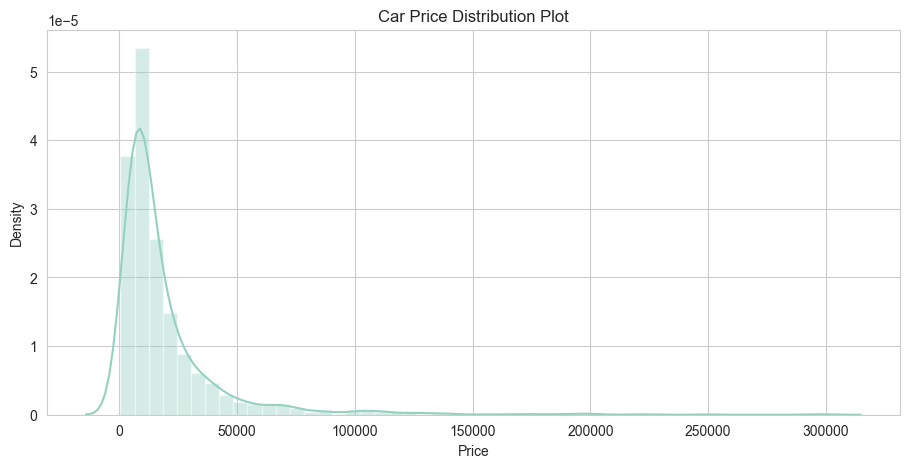

In [115]:
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[11,5])
sns.distplot(df_no_mv['Price'])
plt.title('Car Price Distribution Plot')

C:\Users\samira\AppData\Local\Temp\ipykernel_12680\2304465949.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_mv['Year'])
C:\Users\samira\AppData\Local\Temp\ipykernel_12680\2304465949.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_mv['Mileage'])
C:\Users\samira\AppData\Local

Text(0.5, 1.0, 'EngineV Distribution Plot')

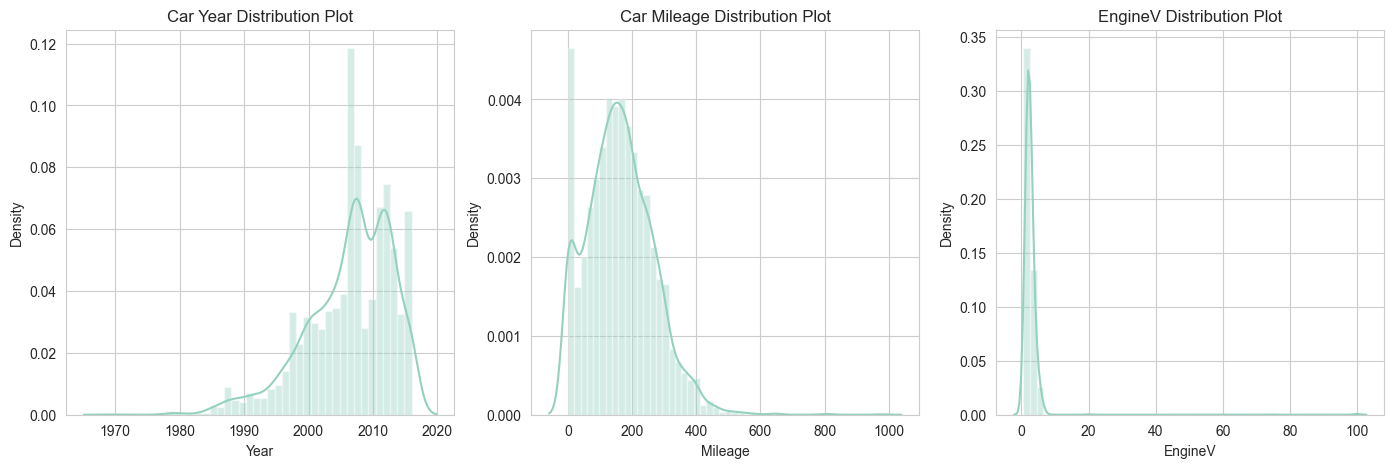

In [116]:
# car and mileage Distribution Plot
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.distplot(df_no_mv['Year'])
plt.title('Car Year Distribution Plot')

plt.subplot(1,3,2)
sns.distplot(df_no_mv['Mileage'])
plt.title('Car Mileage Distribution Plot')

plt.subplot(1,3,3)
sns.distplot(df_no_mv['EngineV'])
plt.title('EngineV Distribution Plot')

* Now its clear that some outliers presents in Price, year, Mileage and EngineV numerical veriables

### Dealing with outliers

* Price column

In [117]:
# Here, the outliers are situated around the higher prices (right side of the graph)
# we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price
# Outliers are a great issue for OLS, thus we must deal with them in some way

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = df_no_mv['Price'].quantile(0.99)

# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = df_no_mv[df_no_mv['Price']<q]

C:\Users\samira\AppData\Local\Temp\ipykernel_12680\2871471748.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


Text(0.5, 1.0, 'Car Price Distribution Plot')

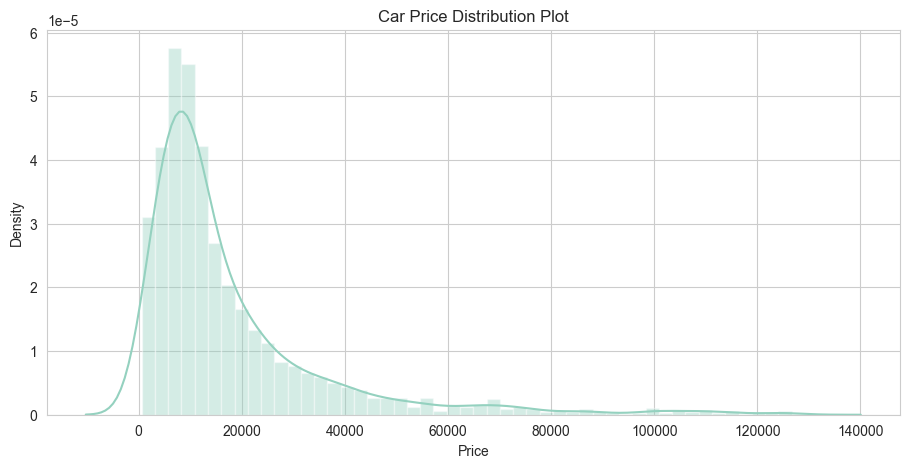

In [118]:
#check the PDF once again
plt.figure(figsize=[11,5])
sns.distplot(data_1['Price'])
plt.title('Car Price Distribution Plot')

However, there are much fewer outliers

 * Mileage Column

C:\Users\samira\AppData\Local\Temp\ipykernel_12680\2578059336.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_mv['Mileage'])


Text(0.5, 1.0, 'Car Mileage Distribution Plot')

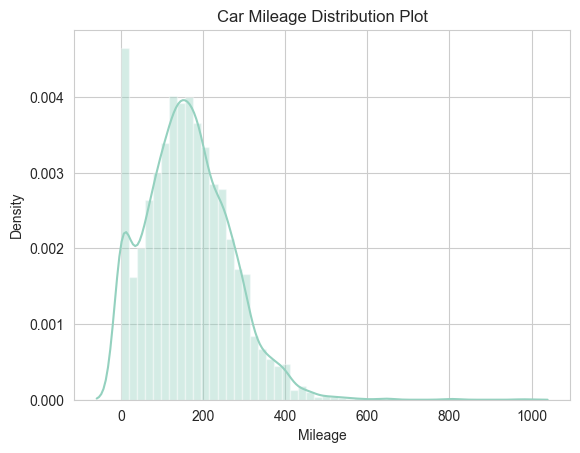

In [119]:
#Now we can treat the other numerical variables outlier in a similar way
sns.distplot(df_no_mv['Mileage'])
plt.title('Car Mileage Distribution Plot')

In [120]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

C:\Users\samira\AppData\Local\Temp\ipykernel_12680\3162106256.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

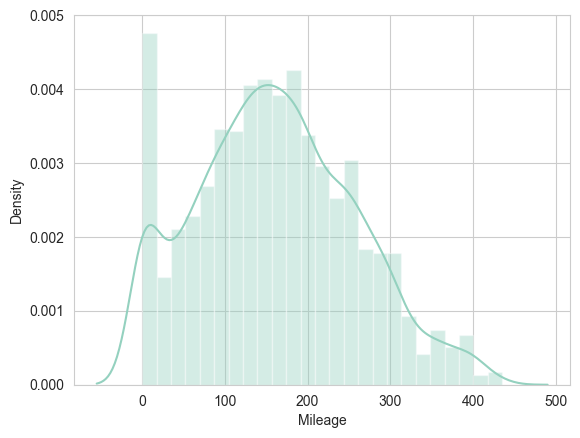

In [121]:
# Hurray this plot looks kind of normal
sns.distplot(data_2['Mileage'])

* Year Column

C:\Users\samira\AppData\Local\Temp\ipykernel_12680\33865767.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_mv['Year'])


<Axes: xlabel='Year', ylabel='Density'>

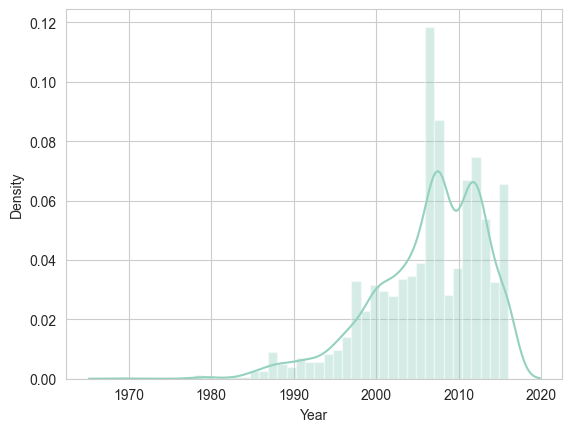

In [122]:
# In this scenario outliers are on the low end
sns.distplot(df_no_mv['Year'])

In [123]:
q = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year']>q]

C:\Users\samira\AppData\Local\Temp\ipykernel_12680\2525852583.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['Year'])


<Axes: xlabel='Year', ylabel='Density'>

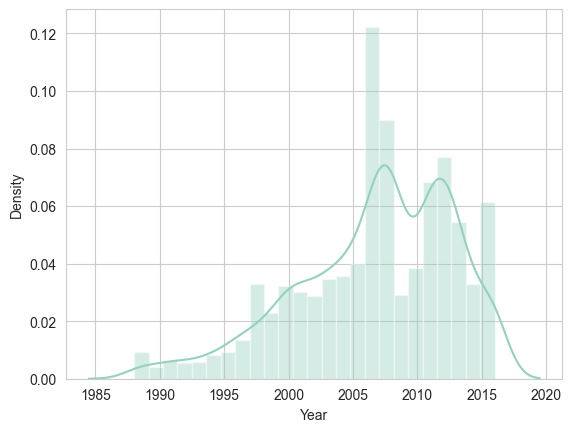

In [124]:
sns.distplot(data_3['Year'])

* EngineV Column

C:\Users\samira\AppData\Local\Temp\ipykernel_12680\3323838879.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_mv['EngineV'])


Text(0.5, 1.0, 'EngineV Distribution Plot')

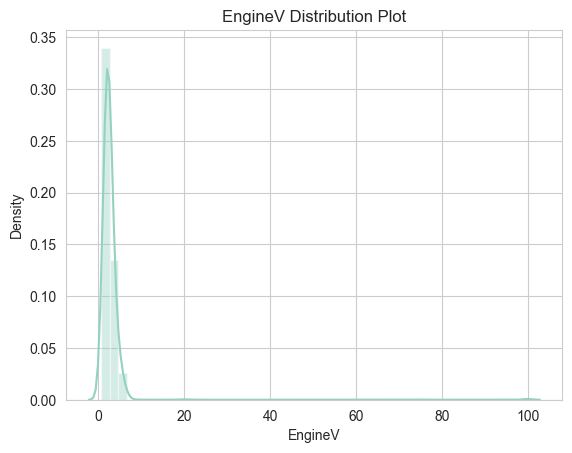

In [125]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.distplot(df_no_mv['EngineV'])
plt.title('EngineV Distribution Plot')

In [126]:
# Car engine volumes are usually (always?) below 6.5l, You can google it
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_4 = data_3[data_3['EngineV']<6.5]

C:\Users\samira\AppData\Local\Temp\ipykernel_12680\3171830115.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

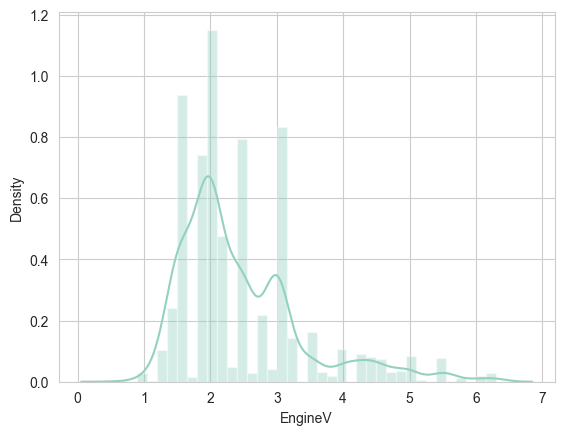

In [127]:
# now its looks kind of normal
sns.distplot(data_4['EngineV'])

In [128]:
# Reset index
cleaned_data = data_4.reset_index(drop=True)

In [129]:
# once again checking discriptive statistics
cleaned_data.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


## lets check the linearity using a scatter plot

Text(0.5, 1.0, 'Price and EngineV')

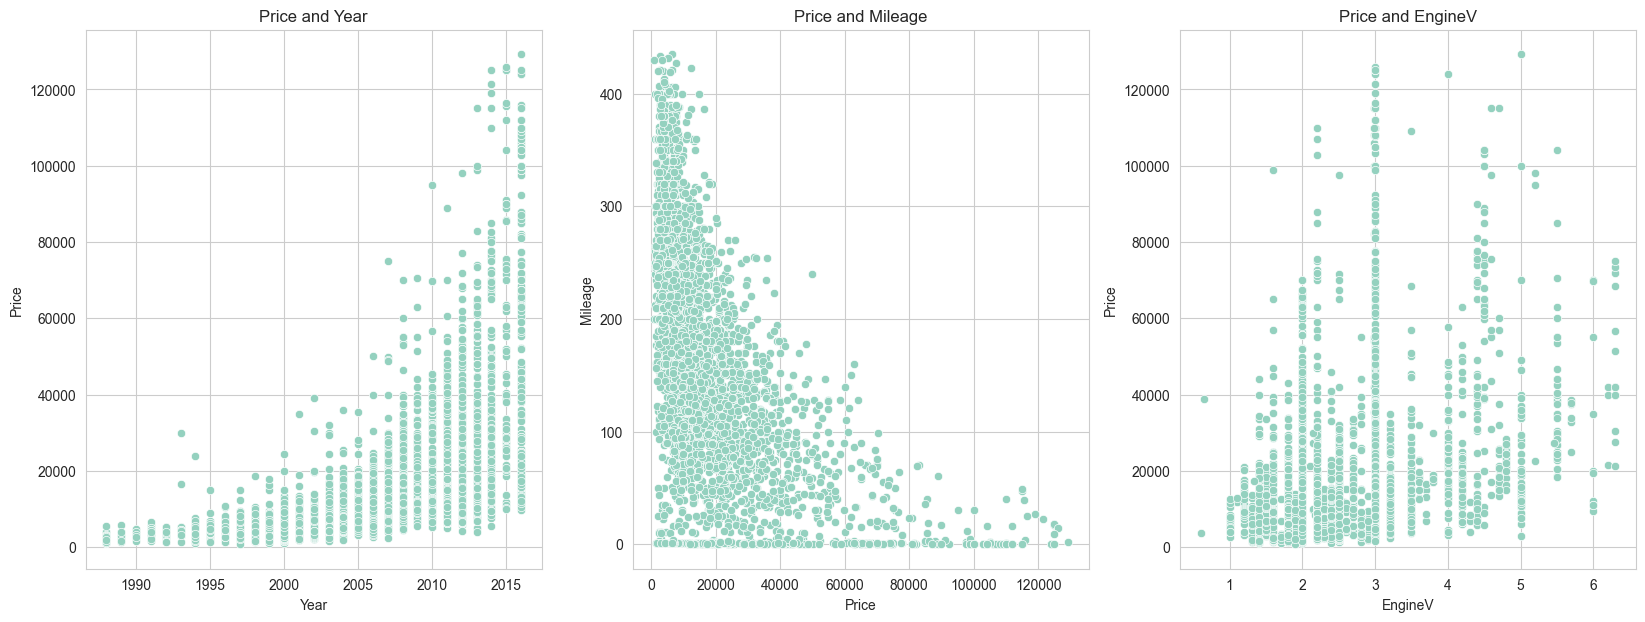

In [130]:
#Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(x='Year',y='Price',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Price and Mileage")
sns.scatterplot(x='Price',y='Mileage',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='Price',x='EngineV',data=cleaned_data)
plt.title("Price and EngineV")

we can spot patterns but definitely not perfect linear once. we know we should not run a linear regression in this case. we should first transform one or more variables recall the ditribution plot of price to all these plot are pointing us towards the idea that **price is not normally distributed.**

And from there its relationships with the other rather normally distributed features is not linear.

C:\Users\samira\AppData\Local\Temp\ipykernel_12680\2984195621.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

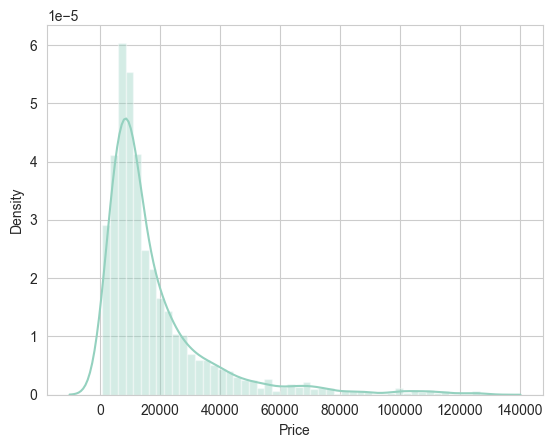

In [131]:
#recall the distribution plot of price
sns.distplot(cleaned_data['Price'])

See The patterns are quite exponentials in this condition **log transformation is a common way to deal with this issue.** log transformation is especially useful when facing exponential scatter plots like we do now.

## Let's transform 'Price' with a log transformation

In [132]:
# Let's transform 'Price' with a log transformation
log_price = np.log(cleaned_data['Price'])

# Then we add it to our data frame
cleaned_data['log_price'] = log_price
cleaned_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


In [133]:
cleaned_data['Mileage'].unique()

array([277, 427, 358, 240, 120, 200, 193, 212, 177, 260, 165, 100, 250,
        84, 203,  21,   0, 132, 225, 130, 163, 151, 330, 171,  65,   1,
        72,  87, 160, 147, 300,  14, 230,  86, 326,  30, 181,  80, 231,
       134, 335,  66, 172, 317, 266, 265, 162,  81, 253, 270, 245, 127,
       152, 267, 178, 190, 175, 105, 195, 126, 420, 180,  51, 287, 222,
       214,  83, 210,  89, 333, 116, 405, 131, 138,  50, 207,  31, 334,
        18, 150,  76, 295,   5, 119, 139, 235,  33, 156, 155,  63, 208,
       103,  57,  64, 137,  82, 153, 125,  60, 257, 197, 164, 205, 145,
       110, 226, 184,  16, 118, 256, 168,  97, 140, 280,  93, 176, 170,
        95,  27, 290, 112, 187, 234, 182, 237,  90,  73, 174, 144,  78,
       201, 390, 350, 148, 189, 296, 179,  99,  91, 216, 102,  38, 115,
        41,  11,  48, 220,  20, 273, 106,  85,  71, 117, 368,   2,  68,
       157, 285,  22,  98, 133, 167, 360, 258,   3, 286, 320, 113,  70,
       198, 108,  12, 173, 142,  47, 186, 185, 246, 263,  54, 13

Text(0.5, 1.0, 'Log price and EngineV')

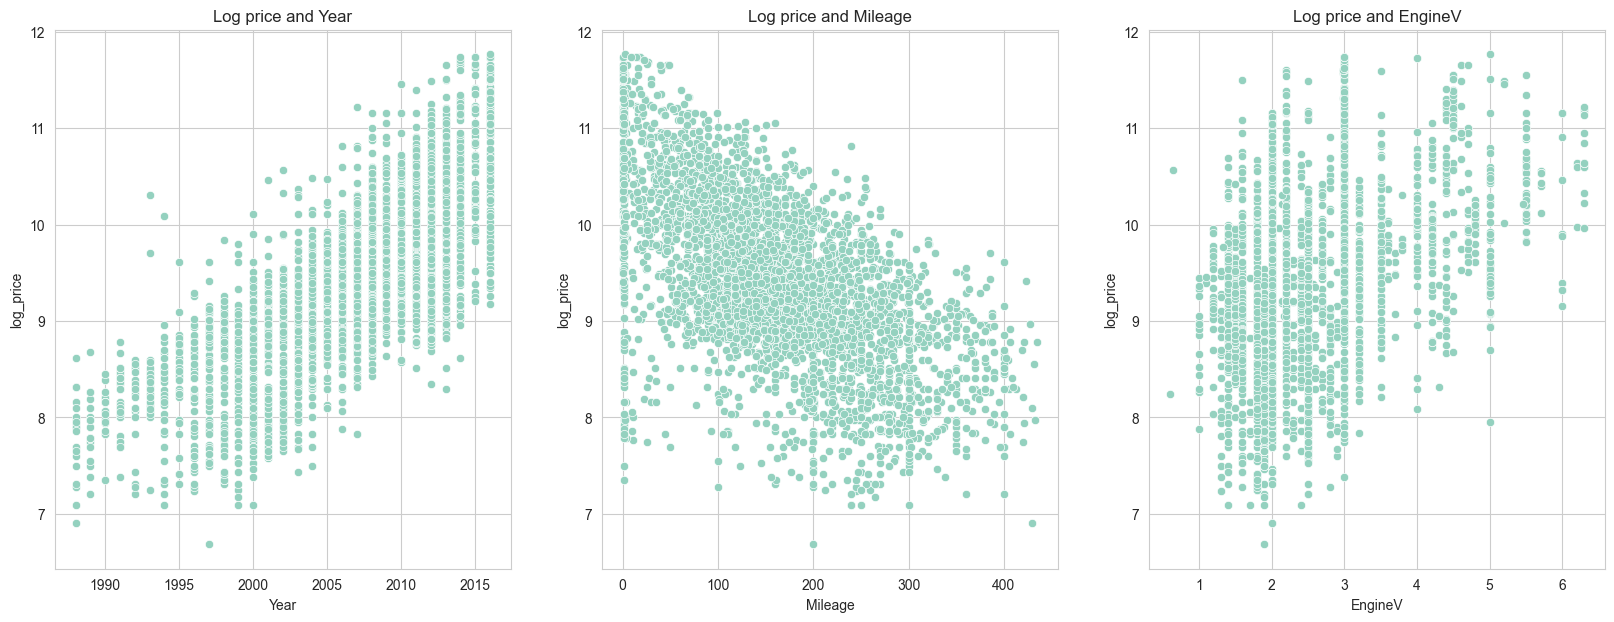

In [134]:
# Let's check the three scatters once again

plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Log price and Year")
sns.scatterplot(x='Year',y='log_price',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Log price and Mileage")
sns.scatterplot(y='log_price',x='Mileage',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='log_price',x='EngineV',data=cleaned_data)
plt.title("Log price and EngineV")

# The relationships show a clear linear relationship
# This is some good linear regression material

## Checking Multicollinearity Using VIF

Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated, making it difficult to isolate the individual effect of each predictor on the dependent variable. 
One way to detect multicollinearity is by using the Variance Inflation Factor (VIF).

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cleaned_data[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


*Fixing Multicollinearity:*

In [136]:
# 'Year' has high VIF so we are just droping that column
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicolinearity = cleaned_data.drop('EngineV',axis=1)

In [137]:
data_no_multicolinearity = cleaned_data.drop(['log_price', 'EngineV'] , axis =1 , inplace =True)

In [138]:
from sklearn.preprocessing import LabelEncoder
temp_data = cleaned_data.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])


# Feature Selection

Feature selection simplified models, improves speed and prevent a series of unwanted issues arising from having many features

## Training and Testing Data

In [139]:
temp_data

,Brand,Price,Body,Mileage,Engine Type,Registration,Year
0,1,4200.0,3,277,3,1,1991
1,2,7900.0,5,427,0,1,1999
2,2,13300.0,3,358,1,1,2003
3,0,23000.0,0,240,3,1,2007
4,5,18300.0,0,120,3,1,2011
...,...,...,...,...,...,...,...
3862,6,11500.0,5,163,0,1,2008
3863,5,17900.0,3,35,3,1,2014
3864,2,125000.0,3,9,0,1,2014
3865,1,6500.0,3,1,3,1,1999


In [140]:
X = temp_data.drop('Price', axis=1)

In [141]:
y = np.log(temp_data['Price'])

In [142]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=365)

# Linear Regression Model

Linear regression is a fundamental and widely used technique in statistics and machine learning for predicting a continuous dependent variable based on one or more independent variables.

In [143]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.7692209631116181
RMSE : 0.43309613236509875


In [144]:
x_train

,Brand,Body,Mileage,Engine Type,Registration,Year
1853,6,5,185,3,1,2008
3467,4,4,78,0,1,2014
1748,6,3,119,0,1,2007
2250,3,0,120,3,1,2008
129,0,2,197,0,1,2006
...,...,...,...,...,...,...
428,1,0,1,0,1,2016
859,0,0,119,0,1,2013
801,2,3,222,3,1,2006
2740,0,4,280,2,0,1999


In [145]:
x_train['Brand'].unique()

array([6, 4, 3, 0, 5, 1, 2])

# Random Forest Regressor Model

Random forests are a popular machine learning technique used for both classification and regression tasks. 

In [146]:
# Model Building
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.8778215959010693
RMSE : 0.31512535733435687


# Select The Best Model

In [147]:
import pickle

In [148]:
with open ('Random_forest.pkl', 'wb') as file:
    pickle.dump(rf, file)